In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex

In [4]:
# names of hurricanes
names = ['Cuba I', 'San Felipe II Okeechobee', 'Bahamas', 'Cuba II', 'CubaBrownsville', 'Tampico', 'Labor Day', 
         'New England', 'Carol', 'Janet', 'Carla', 'Hattie', 'Beulah', 'Camille', 'Edith', 'Anita', 'David', 
         'Allen', 'Gilbert', 'Hugo', 'Andrew', 'Mitch', 'Isabel', 'Ivan', 'Emily', 'Katrina', 'Rita', 'Wilma', 
         'Dean', 'Felix', 'Matthew', 'Irma', 'Maria', 'Michael']

# months of hurricanes
months = ['October', 'September', 'September', 'November', 'August', 'September', 'September', 'September', 
          'September', 'September', 'September', 'October', 'September', 'August', 'September', 'September', 
          'August', 'August', 'September', 'September', 'August', 'October', 'September', 'September', 'July', 
          'August', 'September', 'October', 'August', 'September', 'October', 'September', 'September', 'October']

# years of hurricanes
years = [1924, 1928, 1932, 1932, 1933, 1933, 1935, 1938, 1953, 1955, 1961, 1961, 1967, 1969, 1971, 1977, 1979, 1980,
         1988, 1989, 1992, 1998, 2003, 2004, 2005, 2005, 2005, 2005, 2007, 2007, 2016, 2017, 2017, 2018]

# maximum sustained winds (mph) of hurricanes
max_sustained_winds = [165, 160, 160, 175, 160, 160, 185, 160, 160, 175, 175, 160, 160, 175, 160, 175, 175, 190, 
                       185, 160, 175, 180, 165, 165, 160, 175, 180, 185, 175, 175, 165, 180, 175, 160]

# areas affected by each hurricane
areas_affected = [['Central America', 'Mexico', 'Cuba', 'Florida', 'The Bahamas'], 
                  ['Lesser Antilles', 'The Bahamas', 'United States East Coast', 'Atlantic Canada'], 
                  ['The Bahamas', 'Northeastern United States'], ['Lesser Antilles', 'Jamaica', 'Cayman Islands', 
                    'Cuba', 'The Bahamas', 'Bermuda'], ['The Bahamas', 'Cuba', 'Florida', 'Texas', 'Tamaulipas'], 
                  ['Jamaica', 'Yucatn Peninsula'], ['The Bahamas', 'Florida', 'Georgia', 'The Carolinas', 'Virginia'],
                  ['Southeastern United States', 'Northeastern United States', 'Southwestern Quebec'], 
                  ['Bermuda', 'New England', 'Atlantic Canada'], ['Lesser Antilles', 'Central America'], 
                  ['Texas', 'Louisiana', 'Midwestern United States'], ['Central America'], 
                  ['The Caribbean', 'Mexico', 'Texas'], ['Cuba', 'United States Gulf Coast'], 
                  ['The Caribbean', 'Central America', 'Mexico', 'United States Gulf Coast'], ['Mexico'], 
                  ['The Caribbean', 'United States East coast'], 
                  ['The Caribbean', 'Yucatn Peninsula', 'Mexico', 'South Texas'], 
                  ['Jamaica', 'Venezuela', 'Central America', 'Hispaniola', 'Mexico'], 
                  ['The Caribbean', 'United States East Coast'], ['The Bahamas', 'Florida', 'United States Gulf Coast'], 
                  ['Central America', 'Yucatn Peninsula', 'South Florida'], ['Greater Antilles', 'Bahamas', 'Eastern United States', 'Ontario'],
                  ['The Caribbean', 'Venezuela', 'United States Gulf Coast'], ['Windward Islands', 'Jamaica', 'Mexico', 'Texas'],
                  ['Bahamas', 'United States Gulf Coast'], ['Cuba', 'United States Gulf Coast'], ['Greater Antilles', 'Central America', 'Florida'],
                  ['The Caribbean', 'Central America'], ['Nicaragua', 'Honduras'], 
                  ['Antilles', 'Venezuela', 'Colombia', 'United States East Coast', 'Atlantic Canada'], 
                  ['Cape Verde', 'The Caribbean', 'British Virgin Islands', 'U.S. Virgin Islands', 'Cuba', 'Florida'], 
                  ['Lesser Antilles', 'Virgin Islands', 'Puerto Rico', 'Dominican Republic', 'Turks and Caicos Islands'], 
                  ['Central America', 'United States Gulf Coast (especially Florida Panhandle)']]

# damages (USD($)) of hurricanes
damages = ['Damages not recorded', '100M', 'Damages not recorded', '40M', '27.9M', '5M', 'Damages not recorded', 
           '306M', '2M', '65.8M', '326M', '60.3M', '208M', '1.42B', '25.4M', 'Damages not recorded', '1.54B', 
           '1.24B', '7.1B', '10B', '26.5B', '6.2B', '5.37B', '23.3B', '1.01B', '125B', '12B', '29.4B', '1.76B', 
           '720M', '15.1B', '64.8B', '91.6B', '25.1B']

# deaths for each hurricane
deaths = [90,4000,16,3103,179,184,408,682,5,1023,43,319,688,259,37,11,2068,269,318,107,65,19325,51,124,17,
          1836,125,87,45,133,603,138,3057,74]


In [9]:
areas = pd.DataFrame(areas_affected)
areas.head(2)

,0,1,2,3,4,5
0,Central America,Mexico,Cuba,Florida,The Bahamas,None
1,Lesser Antilles,The Bahamas,United States East Coast,Atlantic Canada,None,None


In [37]:
data = pd.DataFrame({'names': names, 'months': months, 'years': years, 'max winds': max_sustained_winds,
                    'damages': damages, 'deaths': deaths, 'Areas Affected': areas_affected})
data.head()

,names,months,years,max winds,damages,deaths,Areas Affected
0,Cuba I,October,1924,165,Damages not recorded,90,"[Central America, Mexico, Cuba, Florida, The B..."
1,San Felipe II Okeechobee,September,1928,160,100M,4000,"[Lesser Antilles, The Bahamas, United States E..."
2,Bahamas,September,1932,160,Damages not recorded,16,"[The Bahamas, Northeastern United States]"
3,Cuba II,November,1932,175,40M,3103,"[Lesser Antilles, Jamaica, Cayman Islands, Cub..."
4,CubaBrownsville,August,1933,160,27.9M,179,"[The Bahamas, Cuba, Florida, Texas, Tamaulipas]"


In [30]:
conversion = {"M": 1000000, "B": 1000000000}

def convert_damages_data(damages):

  conversion = {"M": 1000000, "B": 1000000000}
  updated_damages = []

  for damage in damages:
    if damage == "Damages not recorded":
      updated_damages.append(damage)
    if damage[-1] == 'M':
      updated_damages.append(float(damage.strip('M'))*conversion["M"])
    if damage[-1] == 'B':
      updated_damages.append(float(damage.strip('B'))*conversion["B"])

  return updated_damages



In [38]:
data['damages'] = convert_damages_data(data['damages'])

In [39]:
data

,names,months,years,max winds,damages,deaths,Areas Affected
0,Cuba I,October,1924,165,Damages not recorded,90,"[Central America, Mexico, Cuba, Florida, The B..."
1,San Felipe II Okeechobee,September,1928,160,1e+08,4000,"[Lesser Antilles, The Bahamas, United States E..."
2,Bahamas,September,1932,160,Damages not recorded,16,"[The Bahamas, Northeastern United States]"
3,Cuba II,November,1932,175,4e+07,3103,"[Lesser Antilles, Jamaica, Cayman Islands, Cub..."
4,CubaBrownsville,August,1933,160,2.79e+07,179,"[The Bahamas, Cuba, Florida, Texas, Tamaulipas]"
5,Tampico,September,1933,160,5e+06,184,"[Jamaica, Yucatn Peninsula]"
6,Labor Day,September,1935,185,Damages not recorded,408,"[The Bahamas, Florida, Georgia, The Carolinas,..."
7,New England,September,1938,160,3.06e+08,682,"[Southeastern United States, Northeastern Unit..."
8,Carol,September,1953,160,2e+06,5,"[Bermuda, New England, Atlantic Canada]"
9,Janet,September,1955,175,6.58e+07,1023,"[Lesser Antilles, Central America]"


In [50]:
data['Areas Affected'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[Cuba, United States Gulf Coast]                                                                2
[The Caribbean, Venezuela, United States Gulf Coast]                                            1
[Cape Verde, The Caribbean, British Virgin Islands, U.S. Virgin Islands, Cuba, Florida]         1
[Jamaica, Venezuela, Central America, Hispaniola, Mexico]                                       1
[Lesser Antilles, Virgin Islands, Puerto Rico, Dominican Republic, Turks and Caicos Islands]    1
[The Bahamas, Cuba, Florida, Texas, Tamaulipas]                                                 1
[Jamaica, Yucatn Peninsula]                                                                     1
[Greater Antilles, Bahamas, Eastern United States, Ontario]                                     1
[The Bahamas, Northeastern United States]                                                       1
[Lesser Antilles, The Bahamas, United States East Coast, Atlantic Canada]                       1
[Bermuda, New Englan

In [51]:
for i, l in enumerate(data['Areas Affected']):
    print("list",i,"is",type(l))

list 0 is <class 'list'>
list 1 is <class 'list'>
list 2 is <class 'list'>
list 3 is <class 'list'>
list 4 is <class 'list'>
list 5 is <class 'list'>
list 6 is <class 'list'>
list 7 is <class 'list'>
list 8 is <class 'list'>
list 9 is <class 'list'>
list 10 is <class 'list'>
list 11 is <class 'list'>
list 12 is <class 'list'>
list 13 is <class 'list'>
list 14 is <class 'list'>
list 15 is <class 'list'>
list 16 is <class 'list'>
list 17 is <class 'list'>
list 18 is <class 'list'>
list 19 is <class 'list'>
list 20 is <class 'list'>
list 21 is <class 'list'>
list 22 is <class 'list'>
list 23 is <class 'list'>
list 24 is <class 'list'>
list 25 is <class 'list'>
list 26 is <class 'list'>
list 27 is <class 'list'>
list 28 is <class 'list'>
list 29 is <class 'list'>
list 30 is <class 'list'>
list 31 is <class 'list'>
list 32 is <class 'list'>
list 33 is <class 'list'>


In [52]:
# https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

In [54]:
to_1D(data['Areas Affected']).value_counts()

Central America                                            9
The Caribbean                                              8
Mexico                                                     7
The Bahamas                                                7
United States Gulf Coast                                   6
Florida                                                    6
Cuba                                                       6
Jamaica                                                    4
Lesser Antilles                                            4
Texas                                                      4
United States East Coast                                   3
Yucatn Peninsula                                           3
Atlantic Canada                                            3
Venezuela                                                  3
Northeastern United States                                 2
Greater Antilles                                           2
Bahamas                 

In [57]:
to_1D(data['Areas Affected']).value_counts().index


Index(['Central America', 'The Caribbean', 'Mexico', 'The Bahamas',
       'United States Gulf Coast', 'Florida', 'Cuba', 'Jamaica',
       'Lesser Antilles', 'Texas', 'United States East Coast',
       'Yucatn Peninsula', 'Atlantic Canada', 'Venezuela',
       'Northeastern United States', 'Greater Antilles', 'Bahamas', 'Bermuda',
       'Georgia', 'Midwestern United States', 'South Texas', 'Louisiana',
       'Dominican Republic', 'Honduras', 'Hispaniola', 'New England',
       'Tamaulipas', 'Nicaragua', 'Puerto Rico', 'Southeastern United States',
       'Antilles', 'Cape Verde', 'Southwestern Quebec', 'Ontario',
       'The Carolinas', 'Colombia',
       'United States Gulf Coast (especially Florida Panhandle)',
       'Eastern United States', 'Virgin Islands', 'South Florida', 'Virginia',
       'Cayman Islands', 'British Virgin Islands', 'United States East coast',
       'Windward Islands', 'U.S. Virgin Islands', 'Turks and Caicos Islands'],
      dtype='object')

In [58]:
to_1D(data['Areas Affected']).value_counts().values

array([9, 8, 7, 7, 6, 6, 6, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

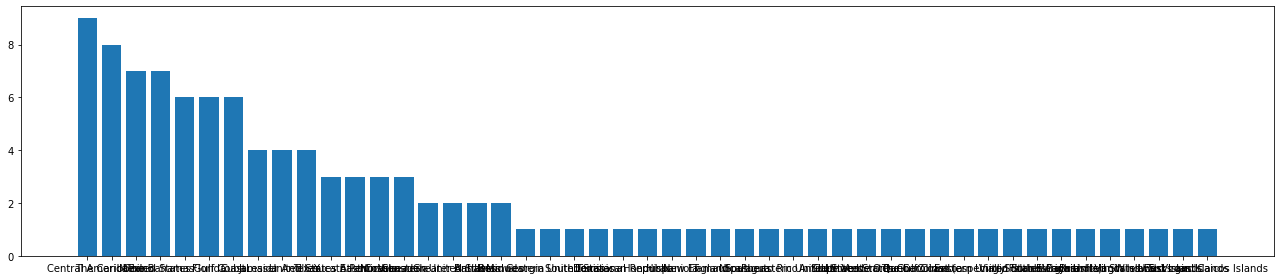

In [66]:
fig, ax = plt.subplots(figsize=(18,4))

ax.bar(to_1D(data['Areas Affected']).value_counts().index,to_1D(data['Areas Affected']).value_counts().values)

plt.tight_layout()
plt.show()

In [67]:
data.head()

,names,months,years,max winds,damages,deaths,Areas Affected
0,Cuba I,October,1924,165,Damages not recorded,90,"[Central America, Mexico, Cuba, Florida, The B..."
1,San Felipe II Okeechobee,September,1928,160,1e+08,4000,"[Lesser Antilles, The Bahamas, United States E..."
2,Bahamas,September,1932,160,Damages not recorded,16,"[The Bahamas, Northeastern United States]"
3,Cuba II,November,1932,175,4e+07,3103,"[Lesser Antilles, Jamaica, Cayman Islands, Cub..."
4,CubaBrownsville,August,1933,160,2.79e+07,179,"[The Bahamas, Cuba, Florida, Texas, Tamaulipas]"


In [68]:
data['max winds'].value_counts()

160    12
175    11
165     4
185     3
180     3
190     1
Name: max winds, dtype: int64